In [1]:
"""
Created on 2023/09/11

@author: huguet
"""
import os
os.environ["OMP_NUM_THREADS"] = '4'

import scipy.spatial.distance
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import pairwise_distances
from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import MiniBatchKMeans
from scipy . cluster . hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors 
from scipy.spatial import distance

---------------------------------------
Affichage données initiales            xclara.arff


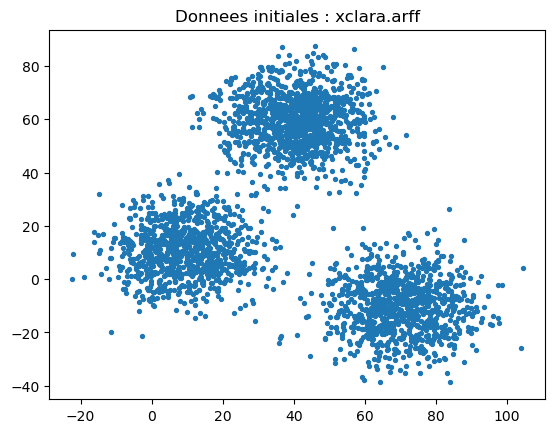

In [13]:
##################################################################
# Exemple :  k-Means Clustering

path = '/home/srafik/Bureau/artificial/'
name="xclara.arff"

#path_out = './fig/'
databrut = arff.loadarff(open(path+str(name), 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])

# PLOT datanp (en 2D) - / scatter plot
# Extraire chaque valeur de features pour en faire une liste
# EX : 
# - pour t1=t[:,0] --> [1, 3, 5, 7]
# - pour t2=t[:,1] --> [2, 4, 6, 8]
print("---------------------------------------")
print("Affichage données initiales            "+ str(name))
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne

#plt.figure(figsize=(6, 6))
plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales : "+ str(name))
#plt.savefig(path_out+"Plot-kmeans-code1-"+str(name)+"-init.jpg",bbox_inches='tight', pad_inches=0.1)
plt.show()

k = 4
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
model.fit(datanp)  # Fit the model
labels = model.labels_
centroids = model.cluster_centers_

In [14]:
adjusted_labels = labels + 1

# Calcul des distances de regroupement
for j in range(1, k+1):  
    center = centroids[j-1]  
    points = datanp[adjusted_labels == j]  
    distances = pairwise_distances(points, [center], metric='euclidean')
    min_distance = distances.min()
    max_distance = distances.max()
    mean_distance = distances.mean()
    print(f"Regroupement Cluster {j}: Min distance {min_distance}, Max distance {max_distance}, Mean distance {mean_distance}")

# Calculate des separation scores 
distances_centroids = pairwise_distances(centroids, metric='euclidean')
for i in range(1, k+1):  
    min_separation = float('inf')
    max_separation = float('-inf')
    sum_separation = 0
    count = 0
    for j in range(1, k+1):  
        if i != j:
            distance = distances_centroids[i-1, j-1]  
            min_separation = min(min_separation, distance)
            max_separation = max(max_separation, distance)
            sum_separation += distance
            count += 1
    mean_separation = sum_separation / count if count > 0 else 0
    print(f"Separation Cluster {i}: Min Separation {min_separation}, Max Separation {max_separation}, Mean Separation {mean_separation}")


Regroupement Cluster 1: Min distance 0.37962826917554676, Max distance 32.19449227864851, Mean distance 12.35373718868065
Regroupement Cluster 2: Min distance 0.04286354001710753, Max distance 34.10464147107068, Mean distance 10.623267739766122
Regroupement Cluster 3: Min distance 0.945158195055349, Max distance 39.18211239834694, Mean distance 12.997305528326626
Regroupement Cluster 4: Min distance 0.6427690676945974, Max distance 30.612317549203834, Mean distance 9.875415408211083
Separation Cluster 1: Min Separation 51.55385181707863, Max Separation 75.86571592517281, Mean Separation 64.22214004501426
Separation Cluster 2: Min Separation 16.861570412254068, Max Separation 57.93451004428159, Mean Separation 42.11664409120476
Separation Cluster 3: Min Separation 57.93451004428159, Max Separation 75.86571592517281, Mean Separation 68.12656242209523
Separation Cluster 4: Min Separation 16.861570412254068, Max Separation 70.57946129683131, Mean Separation 50.89596136729224


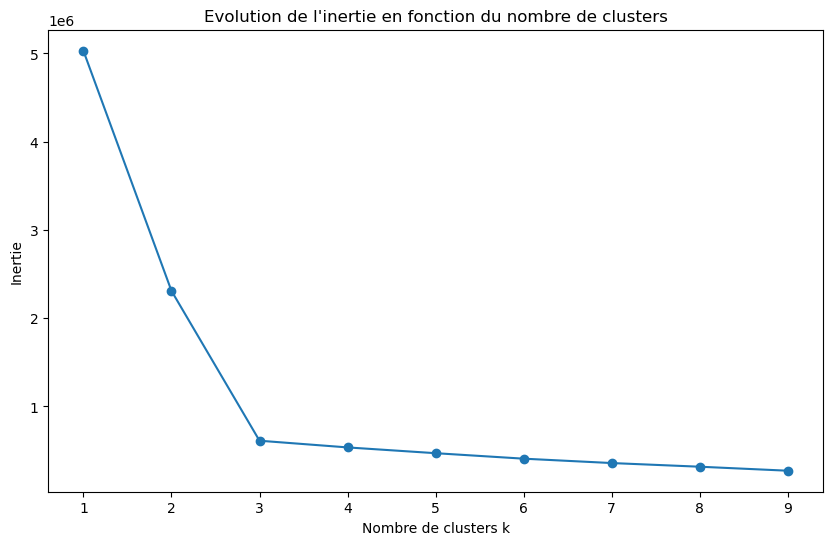

In [15]:
ks = range(1, 10)  
inertias = []

for k in ks:
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    model.fit(datanp)
    inertias.append(model.inertia_)

# Tracer l'évolution de l'inertie
plt.figure(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Nombre de clusters k')
plt.ylabel('Inertie')
plt.title('Evolution de l\'inertie en fonction du nombre de clusters')
plt.xticks(ks)
plt.show()

le temps total d'execution est : 0.21516823768615723


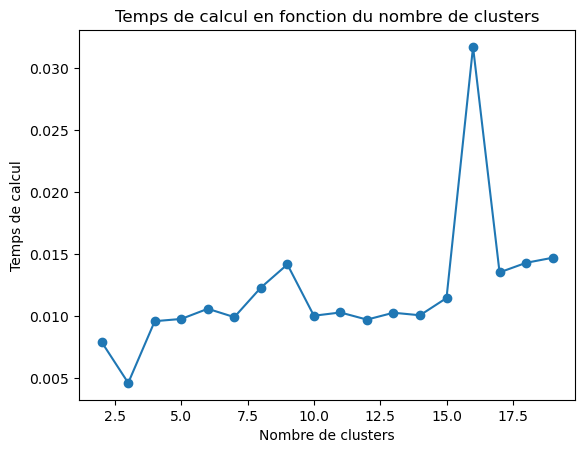

In [16]:
time_list = []
S=0

for k in range(2, 20):  
    start_time = time.time()
    
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
    model.fit(datanp)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    S += elapsed_time
    time_list.append(elapsed_time)

print("le temps total d'execution est :", S)

# Visualisation
plt.figure()
plt.plot(range(2, 20), time_list, marker='o')
plt.title("Temps de calcul en fonction du nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Temps de calcul")
plt.show()


For n_clusters = 2
score silhouette  0.37501250344204135
davies_bouldin 1.0899699773645852
calinski_harabasz 1206.8506706264475
Temps de calcul pour k=2: 0.23761868476867676 secondes
For n_clusters = 3
score silhouette  0.6945587736089913
davies_bouldin 0.42056158508478453
calinski_harabasz 10826.600579461161
Temps de calcul pour k=3: 0.16774702072143555 secondes
For n_clusters = 4
score silhouette  0.5313934685356497
davies_bouldin 0.8597825208551275
calinski_harabasz 8290.564708815178
Temps de calcul pour k=4: 0.18352556228637695 secondes
For n_clusters = 5
score silhouette  0.4295451998317707
davies_bouldin 1.0613348856886788
calinski_harabasz 7184.943216999375
Temps de calcul pour k=5: 0.16478824615478516 secondes
For n_clusters = 6
score silhouette  0.4427260632535958
davies_bouldin 0.96110241938484
calinski_harabasz 6191.120779264358
Temps de calcul pour k=6: 0.16683197021484375 secondes
For n_clusters = 7
score silhouette  0.32003967665029126
davies_bouldin 1.0981531983873019
ca

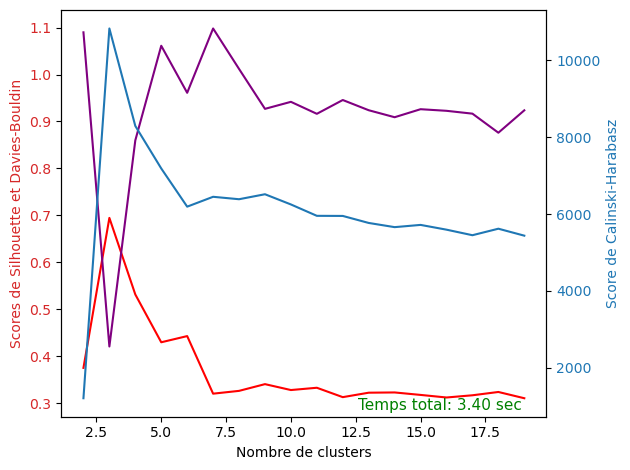

In [17]:
# Calcul Coefficient silhouette, indice Davices-BOuldin, indice de Calinski-Harabasz

nb_clusters = list(range(2, 20))
final_silhou = -1
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

temps_total_debut = time.time()
for k in nb_clusters:
    debut = time.time()
    clusterer = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
    cluster_labels = clusterer.fit_predict(datanp)

    indice_silhouette = silhouette_score(datanp, cluster_labels)
    silhouette_scores.append(indice_silhouette)
    if indice_silhouette > final_silhou:
        final_silhou = indice_silhouette
        nb_optimal_cluster = k

    davies_bouldin = davies_bouldin_score(datanp, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)

    calinski_harabasz = calinski_harabasz_score(datanp, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz)
    fin = time.time()
   
    print(f"For n_clusters = {k}")
    print("score silhouette ", indice_silhouette)
    print("davies_bouldin", davies_bouldin)
    print("calinski_harabasz", calinski_harabasz)
    print(f"Temps de calcul pour k={k}: {fin - debut} secondes")

temps_total_fin = time.time()
temps_total = temps_total_fin - temps_total_debut
print(f"Temps de calcul total : {temps_total_fin - temps_total_debut} secondes")
print(f"Best number of clusters (based on Silhouette score): {nb_optimal_cluster}")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Nombre de clusters')
ax1.set_ylabel('Scores de Silhouette et Davies-Bouldin', color=color)
ax1.plot(nb_clusters, silhouette_scores, color='red')
ax1.plot(nb_clusters, davies_bouldin_scores, color='purple')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Score de Calinski-Harabasz', color=color)
ax2.plot(nb_clusters, calinski_harabasz_scores,color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.text(0.95, 0.01, f'Temps total: {temps_total:.2f} sec', 
         verticalalignment='bottom', horizontalalignment='right', 
         transform=ax2.transAxes, color='green', fontsize=11)

fig.tight_layout()
plt.show()

In [18]:
# MiniBatch

nb_clusters = list(range(2, 20))
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

final_silhou = -1
nb_optimal_cluster = 0

for k in nb_clusters:
    
    clusterer = MiniBatchKMeans(n_clusters=k, random_state=10,init='k-means++', n_init=1, batch_size=100)
    cluster_labels = clusterer.fit_predict(datanp)

    indice_silhouette = silhouette_score(datanp, cluster_labels)
    silhouette_scores.append(indice_silhouette)
    if indice_silhouette > final_silhou:
        final_silhou = indice_silhouette
        nb_optimal_cluster = k

    davies_bouldin = davies_bouldin_score(datanp, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin)
    
    calinski_harabasz = calinski_harabasz_score(datanp, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz)
    
    print("methode MiniBatchKMeans")
    print(f"For n_clusters = {k}")
    print("score silhouette ", indice_silhouette)
    print("davies_bouldin", davies_bouldin)
    print("calinski_harabasz", calinski_harabasz)

print(f"Best number of clusters Minibatch: {nb_optimal_cluster}")

methode MiniBatchKMeans
For n_clusters = 2
score silhouette  0.5381429222611619
davies_bouldin 0.6911955078894678
calinski_harabasz 3509.0643940102955
methode MiniBatchKMeans
For n_clusters = 3
score silhouette  0.6945587736089913
davies_bouldin 0.42056158508478453
calinski_harabasz 10826.600579461165
methode MiniBatchKMeans
For n_clusters = 4
score silhouette  0.5629055331770507
davies_bouldin 0.8344261890144842
calinski_harabasz 8153.49915137578
methode MiniBatchKMeans
For n_clusters = 5
score silhouette  0.44724783739751955
davies_bouldin 1.0954501431109367
calinski_harabasz 6875.504330517888
methode MiniBatchKMeans
For n_clusters = 6
score silhouette  0.44913815220093695
davies_bouldin 0.9845954761062475
calinski_harabasz 6117.673163002312
methode MiniBatchKMeans
For n_clusters = 7
score silhouette  0.30743055322245055
davies_bouldin 1.1373372224951925
calinski_harabasz 6222.599524871841
methode MiniBatchKMeans
For n_clusters = 8
score silhouette  0.31104040292930285
davies_bouldin

Temps total d'exécution pour K-Means: 1700.2372741699219 ms
Temps total d'exécution pour MiniBatch K-Means: 407.4692726135254 ms


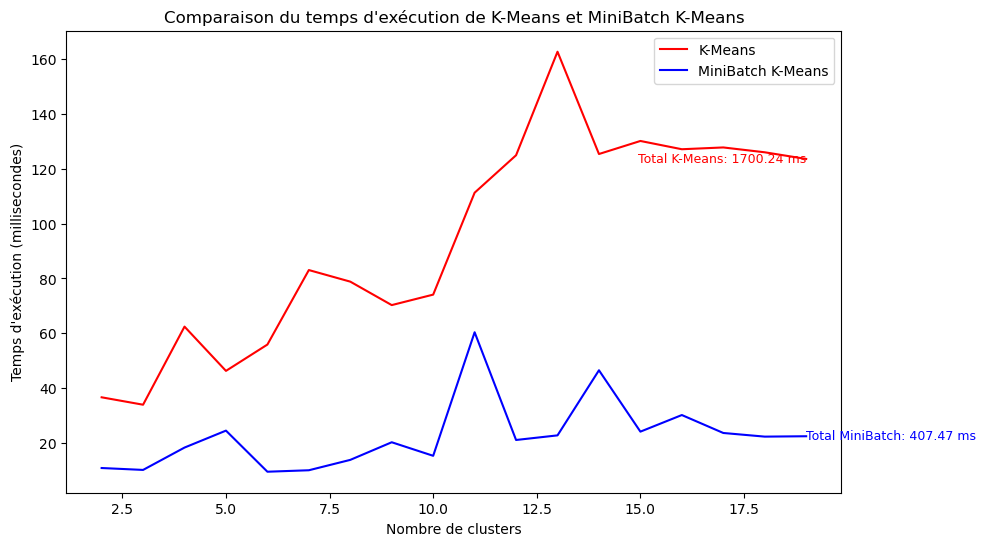

In [20]:
temps_kmeans = []
temps_minibatch = []
temps_total_kmeans = 0
temps_total_minibatch = 0

for k in nb_clusters:
    # K-Means
    debut_kmeans = time.time()
    clusterer_kmeans = cluster.KMeans(n_clusters=k, n_init=10)
    clusterer_kmeans.fit(datanp)
    fin_kmeans = time.time()
    temps_execution_kmeans = (fin_kmeans - debut_kmeans) * 1000
    temps_kmeans.append(temps_execution_kmeans)
    temps_total_kmeans += temps_execution_kmeans
    
    # MiniBatch K-Means
    debut_minibatch = time.time()
    clusterer_minibatch = MiniBatchKMeans(n_clusters=k, random_state=10,init='k-means++', n_init=1, batch_size=100)
    clusterer_minibatch.fit(datanp)
    fin_minibatch = time.time()
    temps_execution_minibatch = (fin_minibatch - debut_minibatch) * 1000
    temps_minibatch.append(temps_execution_minibatch)
    temps_total_minibatch += temps_execution_minibatch

# Afficher le temps total pour chaque algorithme
print(f"Temps total d'exécution pour K-Means: {temps_total_kmeans} ms")
print(f"Temps total d'exécution pour MiniBatch K-Means: {temps_total_minibatch} ms")

# Tracer les temps d'exécution en millisecondes
plt.figure(figsize=(10, 6))
plt.plot(nb_clusters, temps_kmeans, label='K-Means', color='red')
plt.plot(nb_clusters, temps_minibatch, label='MiniBatch K-Means', color='blue')
plt.xlabel('Nombre de clusters')
plt.ylabel('Temps d\'exécution (millisecondes)')
plt.title('Comparaison du temps d\'exécution de K-Means et MiniBatch K-Means')
plt.legend()
plt.text(nb_clusters[-1], temps_kmeans[-1], f'Total K-Means: {temps_total_kmeans:.2f} ms', fontsize=9, verticalalignment='center', horizontalalignment='right', color='red')
plt.text(nb_clusters[-1], temps_minibatch[-1], f'Total MiniBatch: {temps_total_minibatch:.2f} ms', fontsize=9, verticalalignment='center', horizontalalignment='left', color='blue')
plt.show()